# Principais Pontos da Especificação do Trabalho

1. **Definir questões que sejam interessantes para um negócio e que para ser respondidas precisem da Ciência dos Dados. O negócio pode ser qualquer área de atuação.**


2. **Fazer a coleta de dados das fontes de dados disponíveis (pode ser uma fonte ou várias). Avaliando se têm dados para responder as questões identificadas no ponto anterior. Deve avaliar a qualidade dos dados a partir das dimensões de qualidade**


3. **Aplicar métodos de pré-processamento de dados estudados.**


4. **Explorar seus dados, para responder algumas das questões definidas no ponto 1. Outras questões poderão ser só respondidas depois de usar métodos de ML.**

# Equipe

* **Everton - edss.cid20@uea.edu.br**

* **Maisa   - mvt.cid20@uea.edu.br**

* **Paulo   - pcdrc.cid20@uea.edu.br**

* **Tiago  - tvdm.cid20@uea.edu.br**

# Instalação de Pacotes

In [7]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


# Importação de bibliotecas

In [54]:
import pandas as pd
from scipy import stats
#import folium
#from folium import plugins
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

import statistics as st
import statsmodels.stats.proportion as smp
from scipy.stats import norm

# Questões

* Como está o desempenho dos alunos **brasileiros**, segundo o ENEM 2019? Média das notas do brasil e média por região?

* Será que o nível de aprendizado em escolas públicas se difere quanto as zonas de **Manaus**(Norte, Sul, Leste, Oeste, Centro)?

* A renda familiar influencia nas notas dos alunos de **Manaus**?

* O nível de escolaridade da mãe influencia nas notas dos alunos de **Manaus**?

# Coleta dos Dados

## Fonte 1: 

INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Microdados do Enem 2019. Brasília: Inep, 2019. Disponível em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem. Acessado em 21/02/2021.

In [3]:
microdados_enem2019 = pd.read_csv('microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv',sep=';',encoding='ISO-8859-1')

In [3]:
microdados_enem2019.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [4]:
print(len(microdados_enem2019))

5095270


## Fonte 2: 

INSTITUTO NACIONAL DE ESTUDOS E PESQUISAS EDUCACIONAIS ANÍSIO TEIXEIRA. Catálogo de Escolas. Brasília: Inep, 2019. Disponível em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/inep-data/catalogo-de-escolas. Acessado em 21/02/2021.

In [5]:
escolas = pd.read_csv('escolas.csv',sep=';',encoding='utf-8')

In [7]:
escolas.head()

,Restrição de Atendimento,Escola,Código INEP,UF,Município,Localização,Localidade Diferenciada,Categoria Administrativa,Endereço,Telefone,Dependência Administrativa,Categoria Escola Privada,Conveniada Poder Público,Regulamentação pelo Conselho de Educação,Porte da Escola,Etapas e Modalidade de Ensino Oferecidas,Outras Ofertas Educacionais,Latitude,Longitude
0,ESCOLA ATENDE EXCLUSIVAMENTE ALUNOS COM DEFICI...,EEEE ABNAEL MACHADO DE LIMA - CENE,11000023,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Pública,"AVENIDA AMAZONAS, 6492 ZONA LESTE. TIRADENTES....",(69) 992083054,Estadual,Não Informado,Não,Não,Entre 51 e 200 matrículas de escolarização,Ensino Fundamental,Atendimento Educacional Especializado,-8.758459,-63.854011
1,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,EMEIEF PEQUENOS TALENTOS,11000040,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Pública,"RUA CAETANO, 3256 PREDIO. CALADINHO. 76808-108...",(69) 32135237,Municipal,Não Informado,Não,Sim,Entre 201 e 500 matrículas de escolarização,Educação Infantil,NaN,-8.793730,-63.883919
2,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO DE ENSINO CLASSE A,11000058,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"AVENIDA CARLOS GOMES, 1135 CENTRO. 76801-123 P...",(69) 32244473,Privada,Particular,Não,Sim,Mais de 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental, Ensino ...",NaN,-8.760734,-63.901986
3,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUCACIONAL PRESBITERIANO 15 DE NOVEMBRO,11000082,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"RUA ALMIRANTE BARROSO, 1483 SANTA BARBARA. 768...",(69) 32245636,Privada,Particular,Não,Sim,Entre 51 e 200 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.765205,-63.896177
4,ESCOLA EM FUNCIONAMENTO E SEM RESTRIÇÃO DE ATE...,CENTRO EDUC CORA CORALINA,11000104,RO,Porto Velho,Urbana,A escola não está em área de localização difer...,Privada,"RUA MEXICO, 1056 NOVA PORTO VELHO. 76820-190 P...",(69) 32252616,Privada,Particular,Não,Sim,Entre 501 e 1000 matrículas de escolarização,"Educação Infantil, Ensino Fundamental",NaN,-8.768632,-63.875471


In [6]:
print(len(escolas))

222936


## Fonte 3:

Catálogo de Bairros e Zonas de Manaus - Wikipedia - https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Manaus

In [14]:
df_bairro_zona = pd.read_csv('bairros_manaus_x_zona.csv', sep=',')
df_bairro_zona.head()

,Bairro,Zona administrativa,Área (ha),População (estimativa 2017),Densidade Demográfica (hab./km²),Domicílios particulares
0,Adrianópolis,Centro-Sul,"248,45",10 459,"3 560,88",3 224
1,Aleixo,Centro-Sul,"618,34",24 417,"3 340,40",6 101
2,Alvorada,Centro-Oeste,"553,18",76 392,"11 681,73",18 193
3,Armando Mendes,Leste,"307,65",33 441,"9 194,86",7 402
4,Betânia,Sul,"52,51",12 940,"20 845,55",3 119


In [9]:
# Mostar o head()

# Pré-processamento dos Dados

## Pré-processamento - Brasil

In [4]:
#Filtrando somente os registros dos alunos que compareceram pelo oas 2 dias de provas. 
df_brasil_clean = microdados_enem2019.loc[(microdados_enem2019['TP_PRESENCA_CN'] == 1) 
                                   & (microdados_enem2019['TP_PRESENCA_CH'] == 1) 
                                   & (microdados_enem2019['TP_PRESENCA_LC'] == 1) 
                                   & (microdados_enem2019['TP_PRESENCA_MT'] == 1)]

In [5]:
df_brasil_clean

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
5,190001004632,2019,1500800,Ananindeua,15,PA,31,M,1,1,...,A,A,A,B,A,A,D,A,A,A
6,190001004633,2019,1504208,Marabá,15,PA,30,F,2,3,...,A,A,A,B,A,A,B,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,190006129585,2019,2927408,Salvador,29,BA,27,F,0,2,...,A,A,A,B,A,B,C,A,B,B
5095262,190006129586,2019,2928604,Santo Amaro,29,BA,22,F,2,2,...,A,A,A,B,B,A,E,B,B,B
5095263,190006129587,2019,2906808,Cansanção,29,BA,32,M,0,3,...,B,A,A,B,B,A,C,A,B,B
5095268,190006129592,2019,2927408,Salvador,29,BA,16,M,1,1,...,B,A,A,B,B,A,C,A,B,B


In [6]:
df_brasil_clean.groupby('SG_UF_RESIDENCIA')['NU_INSCRICAO'].count().sort_values(ascending=False)

SG_UF_RESIDENCIA
SP    581184
MG    393097
BA    289229
RJ    244340
CE    221918
PA    207807
PE    202753
MA    164049
RS    156058
PR    150462
GO    123721
PB    114046
PI     94239
RN     90383
SC     79135
AM     74486
ES     72368
AL     68750
DF     66709
MT     60471
SE     57886
MS     48751
RO     40880
TO     33802
AP     29552
AC     27133
RR      8799
Name: NU_INSCRICAO, dtype: int64

In [7]:
# Retirando registros que CO_ESCOLA é NaN
df_brasil_clean = df_brasil_clean.dropna(subset=['CO_ESCOLA']).reset_index(drop=True)

In [8]:
df_brasil_clean_copy = df_brasil_clean.copy() #Copia para usar na análise de Manaus
df_brasil_clean


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
1,190001004634,2019,1501402,Belém,15,PA,26,F,0,3,...,A,A,A,B,A,A,B,A,A,A
2,190001004642,2019,1502400,Castanhal,15,PA,17,F,1,3,...,A,A,A,B,B,A,D,A,A,A
3,190001004643,2019,1501402,Belém,15,PA,17,F,1,3,...,A,A,A,D,A,A,C,A,A,A
4,190001004651,2019,1505502,Paragominas,15,PA,18,F,1,3,...,B,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953908,190006120165,2019,3136207,João Monlevade,31,MG,17,F,1,1,...,A,A,A,B,A,A,B,B,B,B
953909,190006120169,2019,3169406,Três Pontas,31,MG,18,F,1,1,...,B,A,A,C,B,B,D,B,B,B
953910,190006120174,2019,3131901,Itabirito,31,MG,18,F,1,2,...,A,A,B,E,B,B,E,B,C,B
953911,190006120176,2019,3170206,Uberlândia,31,MG,18,F,1,3,...,A,A,A,B,A,A,E,A,B,B


In [19]:
df_brasil_clean.groupby('SG_UF_RESIDENCIA')['NU_INSCRICAO'].count().sort_values(ascending=False)

SG_UF_RESIDENCIA
SP    176899
MG     92115
CE     88161
RJ     61694
BA     59692
PE     50772
PR     42423
PA     40240
RS     39110
MA     36710
GO     31037
SC     28252
PB     23726
ES     21759
PI     20981
AM     20158
DF     18124
RN     18093
MT     15021
AL     14973
MS     13186
SE     11738
RO      9741
TO      7767
AP      5209
AC      4580
RR      1752
Name: NU_INSCRICAO, dtype: int64

In [ ]:
# Diminuindo Dimensionalidade
df_brasil_clean = df_brasil_clean.drop(columns=
 ['NU_ANO',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'SG_UF_NASCIMENTO',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DEFICIENCIA_AUDITIVA',
 'IN_SURDO_CEGUEIRA',
 'IN_DEFICIENCIA_FISICA',
 'IN_DEFICIENCIA_MENTAL',
 'IN_DEFICIT_ATENCAO',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_AUTISMO',
 'IN_VISAO_MONOCULAR',
 'IN_OUTRA_DEF',
 'IN_GESTANTE',
 'IN_LACTANTE',
 'IN_IDOSO',
 'IN_ESTUDA_CLASSE_HOSPITALAR',
 'IN_SEM_RECURSO',
 'IN_BRAILLE',
 'IN_AMPLIADA_24',
 'IN_AMPLIADA_18',
 'IN_LEDOR',
 'IN_ACESSO',
 'IN_TRANSCRICAO',
 'IN_LIBRAS',
 'IN_TEMPO_ADICIONAL',
 'IN_LEITURA_LABIAL',
 'IN_MESA_CADEIRA_RODAS',
 'IN_MESA_CADEIRA_SEPARADA',
 'IN_APOIO_PERNA',
 'IN_GUIA_INTERPRETE',
 'IN_COMPUTADOR',
 'IN_CADEIRA_ESPECIAL',
 'IN_CADEIRA_CANHOTO',
 'IN_CADEIRA_ACOLCHOADA',
 'IN_PROVA_DEITADO',
 'IN_MOBILIARIO_OBESO',
 'IN_LAMINA_OVERLAY',
 'IN_PROTETOR_AURICULAR',
 'IN_MEDIDOR_GLICOSE',
 'IN_MAQUINA_BRAILE',
 'IN_SOROBAN',
 'IN_MARCA_PASSO',
 'IN_SONDA',
 'IN_MEDICAMENTOS',
 'IN_SALA_INDIVIDUAL',
 'IN_SALA_ESPECIAL',
 'IN_SALA_ACOMPANHANTE',
 'IN_MOBILIARIO_ESPECIFICO',
 'IN_MATERIAL_ESPECIFICO',
 'IN_NOME_SOCIAL',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'SG_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TP_LINGUA',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009',
 'Q010',
 'Q011',
 'Q012',
 'Q013',
 'Q014',
 'Q015',
 'Q016',
 'Q017',
 'Q018',
 'Q019',
 'Q020',
 'Q021',
 'Q022',
 'Q023',
 'Q024',
 'Q025']).reset_index(drop=True)

In [ ]:
df_brasil_clean

In [15]:
# Transformando campo CO_MUNICIPIO_ESC de Inteiro para String
# 1º dígito: Região; 
# 1º e 2º dígitos: UF;
# 3º, 4º, 5º e 6º dígitos: Município;
# 7º dígito: dígito verificador.

df_brasil_clean['CO_MUNICIPIO_ESC'] = df_brasil_clean['CO_MUNICIPIO_ESC'].apply(str)

## Pré-processamento - Manaus

In [9]:
# Coloque aqui o pre-processamento para as análises referente a Manaus
df_brasil_clean_copy.drop(['NU_ANO', 'CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO', 'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC','CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24', 'IN_AMPLIADA_18', 'IN_LEDOR', 'IN_ACESSO', 'IN_TRANSCRICAO', 'IN_LIBRAS', 'IN_TEMPO_ADICIONAL', 'IN_LEITURA_LABIAL', 'IN_MESA_CADEIRA_RODAS', 'IN_MESA_CADEIRA_SEPARADA', 'IN_APOIO_PERNA', 'IN_GUIA_INTERPRETE', 'IN_COMPUTADOR', 'IN_CADEIRA_ESPECIAL', 'IN_CADEIRA_CANHOTO', 'IN_CADEIRA_ACOLCHOADA', 'IN_PROVA_DEITADO', 'IN_MOBILIARIO_OBESO', 'IN_LAMINA_OVERLAY', 'IN_PROTETOR_AURICULAR', 'IN_MEDIDOR_GLICOSE', 'IN_MAQUINA_BRAILE', 'IN_SOROBAN', 'IN_MARCA_PASSO', 'IN_SONDA', 'IN_MEDICAMENTOS', 'IN_SALA_INDIVIDUAL', 'IN_SALA_ESPECIAL', 'IN_SALA_ACOMPANHANTE', 'IN_MOBILIARIO_ESPECIFICO', 'IN_MATERIAL_ESPECIFICO', 'IN_NOME_SOCIAL', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT','TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','Q001', 'Q002', 'Q003', 'Q004', 'Q005','Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'], axis='columns',inplace=True)

#####
df_manaus = df_brasil_clean_copy[df_brasil_clean_copy['NO_MUNICIPIO_ESC']=='Manaus']
df_manaus

,NU_INSCRICAO,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006
61,190001005023,Manaus,400.7,350.9,440.7,444.1,420.0,A
1508,190001013052,Manaus,343.7,456.0,530.1,445.9,400.0,B
4472,190001027976,Manaus,376.6,457.3,414.8,397.5,400.0,B
4473,190001027979,Manaus,436.3,495.3,511.4,414.5,560.0,B
4474,190001027985,Manaus,454.8,371.7,560.2,419.2,340.0,B
...,...,...,...,...,...,...,...,...
953789,190006119530,Manaus,550.4,614.1,571.0,808.9,480.0,C
953790,190006119541,Manaus,480.9,447.2,507.4,397.2,480.0,B
953792,190006119563,Manaus,576.9,588.9,594.4,671.6,880.0,C
953793,190006119564,Manaus,593.7,592.4,614.0,642.0,760.0,D


In [13]:
# Coloque aqui o pre-processamento para as análises referente a Manaus
df_manaus_A_B_C = df_manaus.loc[(df_manaus["Q006"]=="A") | (df_manaus["Q006"]=="B") | (df_manaus["Q006"]=="C")]
df_manaus_A_B_C["NOTA TOTAL"] = df_manaus_A_B_C.iloc[:,4:10].sum(axis=1)
save_A_B_C = []
for x in df_manaus_A_B_C["NOTA TOTAL"]:
    save_A_B_C.append(x)
arr_A_B_C = np.array(save_A_B_C)
print(type(arr_A_B_C))

df_manaus_acima = df_manaus.loc[(df_manaus["Q006"]=="D") | (df_manaus["Q006"]=="E") | (df_manaus["Q006"]=="F") | (df_manaus["Q006"]=="G") | (df_manaus["Q006"]=="H") | (df_manaus["Q006"]=="I") | (df_manaus["Q006"]=="F") | (df_manaus["Q006"]=="J") | (df_manaus["Q006"]=="K") | (df_manaus["Q006"]=="L") | (df_manaus["Q006"]=="M") | (df_manaus["Q006"]=="N") | (df_manaus["Q006"]=="O") | (df_manaus["Q006"]=="P") | (df_manaus["Q006"]=="Q")]
df_manaus_acima["SOMA TOTAL"] = df_manaus_acima.iloc[:,4:10].sum(axis=1)

save_acima = []
for x in df_manaus_acima["SOMA TOTAL"]:
    save_acima.append(x)
arr_acima = np.array(save_acima)
print(type(arr_acima))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/pcorrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pcorrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


# Exploração dos Dados

### **Como está o desempenho dos alunos brasileiros, segundo o ENEM 2019? Média das notas do brasil e média por região?**

In [26]:
def media(row):
    return (row['NU_NOTA_CN'] + row['NU_NOTA_CH'] + row['NU_NOTA_LC'] + row['NU_NOTA_MT'])/4

def regiao(row):
    if row['CO_MUNICIPIO_ESC'][0] == '1':
        return 'NORTE'
    elif row['CO_MUNICIPIO_ESC'][0] == '2':
        return 'NORDESTE'
    elif row['CO_MUNICIPIO_ESC'][0] == '3':
        return 'SUDESTE'
    elif row['CO_MUNICIPIO_ESC'][0] == '4':
        return 'SUL'
    elif row['CO_MUNICIPIO_ESC'][0] == '5':
        return 'CENTRO-OESTE'
    else:
        return 'OUTRA'

In [27]:
df_brasil_clean['MEDIA_OBJETIVAS'] = df_brasil_clean.apply(media, axis=1)
df_brasil_clean['REGIAO'] = df_brasil_clean.apply(regiao, axis=1)

In [28]:
df_brasil_clean

,NU_INSCRICAO,TP_SEXO,TP_ESCOLA,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,SG_UF_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,MEDIA_OBJETIVAS,REGIAO
0,190001004629,F,3,15230023.0,1505502.0,Paragominas,PA,574.2,538.7,582.6,571.5,640.0,566.750,NORTE
1,190001004634,F,2,15042626.0,1501402.0,Belém,PA,369.7,398.2,395.6,473.8,480.0,409.325,NORTE
2,190001004642,F,2,15045560.0,1502400.0,Castanhal,PA,376.4,354.7,525.8,389.4,660.0,411.575,NORTE
3,190001004643,F,2,15038378.0,1501402.0,Belém,PA,423.0,372.8,488.7,516.5,540.0,450.250,NORTE
4,190001004651,F,2,15582949.0,1505502.0,Paragominas,PA,412.5,417.2,485.1,446.2,580.0,440.250,NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953908,190006120165,F,2,31103527.0,3136207.0,João Monlevade,MG,533.3,485.8,530.2,595.5,540.0,536.200,SUDESTE
953909,190006120169,F,2,31174688.0,3169406.0,Três Pontas,MG,486.2,543.4,560.3,535.2,740.0,531.275,SUDESTE
953910,190006120174,F,2,31253227.0,3146107.0,Ouro Preto,MG,500.8,563.2,555.3,442.8,780.0,515.525,SUDESTE
953911,190006120176,F,2,31009107.0,3170206.0,Uberlândia,MG,491.6,549.3,586.8,633.5,640.0,565.300,SUDESTE


**Média das Provas Objetivas - Brasil**

In [14]:
media_brasil = df_brasil_clean['MEDIA_OBJETIVAS'].mean()
print("Média Brasil (Provas Objetivas): %.2f"%(media_brasil))

Média Brasil (Provas Objetivas): 505.61


**Média das Provas Objetivas - Por Região**

In [15]:
medias_por_regiao_obj = df_brasil_clean.groupby('REGIAO')['MEDIA_OBJETIVAS'].mean().sort_values(ascending=False)
medias_por_regiao_obj

REGIAO
SUDESTE         522.865334
SUL             522.774008
CENTRO-OESTE    509.082057
NORDESTE        487.219622
NORTE           480.360220
Name: MEDIA_OBJETIVAS, dtype: float64

<AxesSubplot:title={'center':'Comparação entre médias(Provas Objetivas) por região'}, xlabel='Região', ylabel='Média'>

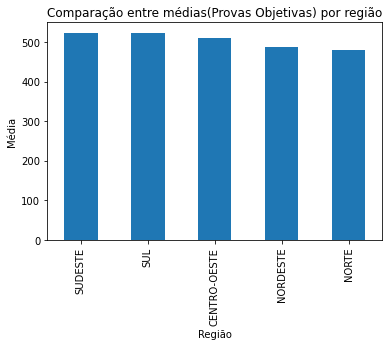

In [16]:
medias_por_regiao_obj.plot(kind='bar', title='Comparação entre médias(Provas Objetivas) por região', xlabel='Região',ylabel='Média')

In [17]:
quadro_resumo = df_brasil_clean[['REGIAO','MEDIA_OBJETIVAS']].groupby(['REGIAO']).mean().sort_values(by='MEDIA_OBJETIVAS',ascending=False).reset_index()

In [18]:
maior_media = quadro_resumo.iloc[0]['MEDIA_OBJETIVAS']
print(maior_media)

522.8653339414684


In [81]:
quadro_resumo['% em relação a média do Brasil'] = (quadro_resumo['MEDIA_OBJETIVAS']/media_brasil*100)-100
quadro_resumo['% em relação a maior média das Regiões'] = (quadro_resumo['MEDIA_OBJETIVAS']/maior_media*100)-100
quadro_resumo

,REGIAO,MEDIA_OBJETIVAS,% em relação a média do Brasil,% em relação a maior média das Regiões
0,SUDESTE,522.865334,3.412756,0.000000
1,SUL,522.774008,3.394694,-0.017466
2,CENTRO-OESTE,509.082057,0.686688,-2.636105
3,NORDESTE,487.219622,-3.637283,-6.817379
4,NORTE,480.360220,-4.993942,-8.129266


**Será que essas médias são estatisticamente diferentes a um nível de significância de 0.05?**

Hipóteses

H0: As médias são iguais entre as diversas regiões do país.

H1: As médias são diferentes entre as diversas regiões do país.

TESTE ANOVA

  Assume distribuição normal na amostra e variâncias semelhantes.


### Normalidade dos Dados

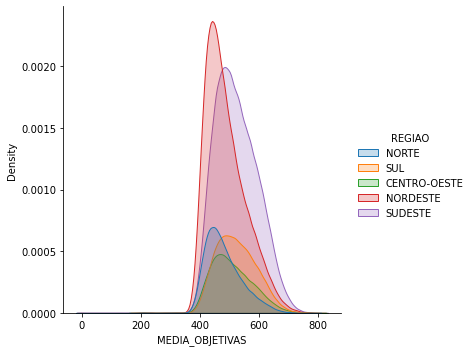

In [16]:
sns.displot(df_brasil_clean, x="MEDIA_OBJETIVAS", hue="REGIAO", kind="kde", fill=True)

In [13]:
dados_SUDESTE = pd.DataFrame()
dados_SUL = pd.DataFrame()
dados_CENTRO_OESTE = pd.DataFrame()
dados_NORDESTE = pd.DataFrame()
dados_NORTE = pd.DataFrame()

dados_SUDESTE['MEDIA_OBJETIVAS'] = df_brasil_clean['MEDIA_OBJETIVAS'].loc[df_brasil_clean.loc[:,'REGIAO']=='SUDESTE']
dados_SUL['MEDIA_OBJETIVAS'] = df_brasil_clean['MEDIA_OBJETIVAS'].loc[df_brasil_clean.loc[:,'REGIAO']=='SUL']
dados_CENTRO_OESTE['MEDIA_OBJETIVAS'] = df_brasil_clean['MEDIA_OBJETIVAS'].loc[df_brasil_clean.loc[:,'REGIAO']=='CENTRO-OESTE']
dados_NORDESTE['MEDIA_OBJETIVAS'] = df_brasil_clean['MEDIA_OBJETIVAS'].loc[df_brasil_clean.loc[:,'REGIAO']=='NORDESTE']
dados_NORTE['MEDIA_OBJETIVAS'] = df_brasil_clean['MEDIA_OBJETIVAS'].loc[df_brasil_clean.loc[:,'REGIAO']=='NORTE']

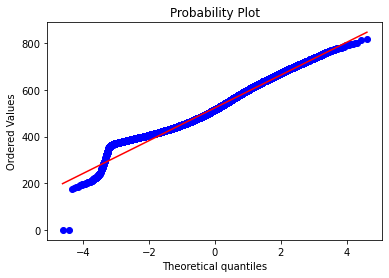

In [22]:
fig, ax = plt.subplots()
stats.probplot(dados_SUDESTE['MEDIA_OBJETIVAS'], fit=True,   plot=ax)
plt.show()

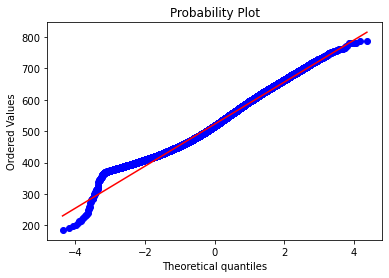

In [23]:
fig, ax = plt.subplots()
stats.probplot(dados_SUL['MEDIA_OBJETIVAS'], fit=True,   plot=ax)
plt.show()


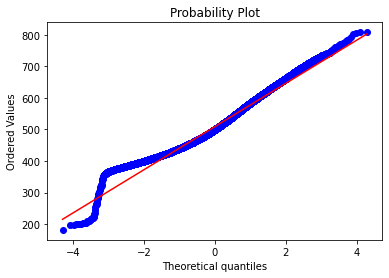

In [24]:
fig, ax = plt.subplots()
stats.probplot(dados_CENTRO_OESTE['MEDIA_OBJETIVAS'], fit=True,   plot=ax)
plt.show()

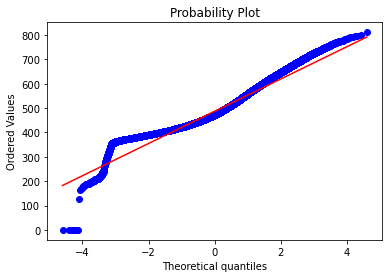

In [25]:
fig, ax = plt.subplots()
stats.probplot(dados_NORDESTE['MEDIA_OBJETIVAS'], fit=True,   plot=ax)
plt.show()

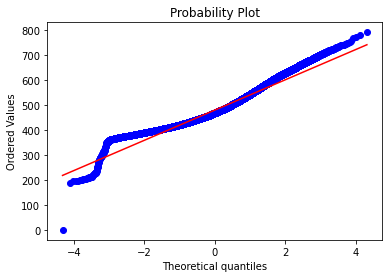

In [26]:
fig, ax = plt.subplots()
stats.probplot(dados_NORTE['MEDIA_OBJETIVAS'], fit=True,   plot=ax)
plt.show()

### Variância

In [17]:
df_var = df_brasil_clean.groupby('REGIAO')['MEDIA_OBJETIVAS'].var().reset_index()

In [18]:
df_var

,REGIAO,MEDIA_OBJETIVAS
0,CENTRO-OESTE,4806.022551
1,NORDESTE,4613.182430
2,NORTE,3845.678927
3,SUDESTE,5028.263708
4,SUL,4540.578935


### Teste ANOVA

In [36]:
lm = ols('MEDIA_OBJETIVAS ~ (REGIAO)', df_brasil_clean).fit()

In [39]:
sm.stats.anova_lm(lm,typ=2)

,sum_sq,df,F,PR(>F)
REGIAO,3.051259e+08,4.0,16223.72231,0.0
Residual,4.485131e+09,953908.0,NaN,NaN


P-value = 0.0, que é menor que alpha=0.05. Então rejeita-se H0, e aceita H1, as médias são estatisticamente diferentes.

In [59]:
df_sul_sudeste = df_brasil_clean.loc[(df_brasil_clean['REGIAO']=='SUL') | (df_brasil_clean['REGIAO']=='SUDESTE')]

In [60]:
lm_sul_sudeste = ols('MEDIA_OBJETIVAS ~ (REGIAO)', df_sul_sudeste).fit()

In [61]:
sm.stats.anova_lm(lm_teste,typ=2)

,sum_sq,df,F,PR(>F)
REGIAO,6.980612e+02,1.0,0.1421,0.706202
Residual,2.270545e+09,462202.0,NaN,NaN


P-value = 0.7, que é maior que alpha=0.05. Então, aceita-se H0, as médias entre SUL e SUDESTE são estatisticamente iguais.

## Visão Geográfica

In [19]:
medias_por_cd_escola_obj = df_brasil_clean.groupby('CO_ESCOLA')['MEDIA_OBJETIVAS'].mean().sort_values(ascending=False)

In [22]:
escola_localizacao = pd.merge(medias_por_cd_escola_obj,escolas,how="left",left_on="CO_ESCOLA",right_on="Código INEP")

In [23]:
escola_localizacao.dropna(subset=['Latitude'],inplace=True)

In [24]:
escola_localizacao[['MEDIA_OBJETIVAS','Escola','UF','Município','Localização','Categoria Administrativa','Latitude','Longitude']]

,MEDIA_OBJETIVAS,Escola,UF,Município,Localização,Categoria Administrativa,Latitude,Longitude
0,734.275000,ORLANDO GARCIA DA SILVEIRA COLEGIO,SP,São Paulo,Urbana,Privada,-23.495800,-46.699090
1,724.175000,COL PODION ENSINO FUNDAMENTAL,DF,Brasília,Urbana,Privada,-15.750122,-47.897209
2,716.367857,FARIAS BRITO COLEGIO DE APLICACAO,CE,Fortaleza,Urbana,Privada,-3.736603,-38.486147
3,715.390152,ARI DE SA CAVALCANTE SEDE MARIO MAMEDE COLEGIO,CE,Fortaleza,Urbana,Privada,-3.755333,-38.524310
4,713.650000,COLEGIO DOM BOSCO DE IBIUNA,SP,Ibiúna,Urbana,Privada,-23.657281,-47.221812
...,...,...,...,...,...,...,...,...
29605,333.762500,CESEC MAESTRO CARLOS RIBEIRO DA SILVA,MG,São Gonçalo do Pará,Urbana,Pública,-19.981572,-44.850264
29607,304.750000,U E MARIA MENDES MOURAO,PI,Pedro II,Urbana,Pública,-4.421094,-41.451041
29608,299.050000,ESCOLA MUNICIPAL DE EDUCACAO BASICA WALDEMAR B...,RS,Alegrete,Urbana,Pública,-29.806260,-55.750180
29609,264.775000,COLEGIO ESTADUAL PROFESSOR JULIO CAVALCANTI,GO,Mara Rosa,Urbana,Pública,-14.020330,-49.171384


### Onde estão as 100 escolas mais bem avaliadas pelo ENEM 2019?

In [26]:
coordenadas_melhores=[]
for lat,lng in zip(escola_localizacao.Latitude.values[:100],escola_localizacao.Longitude.values[:100]):
  coordenadas_melhores.append([lat,lng])

In [27]:
# Renderizando o mapa com algumas personalizações:
mapa_melhores = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
# Adicionando os registros no mapa de calor:
mapa_melhores.add_child(plugins.HeatMap(coordenadas_melhores))        
mapa_melhores

### Onde estão as 100 escolas menos bem avaliadas pelo ENEM 2019?

In [28]:
coordenadas_piores=[]
for lat,lng in zip(escola_localizacao.Latitude.values[-100:],escola_localizacao.Longitude.values[-100:]):
  coordenadas_piores.append([lat,lng])

In [32]:
# Renderizando o mapa com algumas personalizações:
mapa_piores = folium.Map(location=[-15.788497,-47.879873],zoom_start=5,tiles='Stamen Toner')
# Adicionando os registros no mapa de calor:
mapa_piores.add_child(plugins.HeatMap(coordenadas_piores))        
mapa_piores

## **Será que o nível de aprendizado em escolas públicas se difere quanto as zonas de Manaus(Norte, Sul, Leste, Oeste, Centro)?**

## **A renda familiar influencia nas notas dos alunos de Manaus?**

In [14]:
def media_manaus(row):
    return (row['NU_NOTA_CN'] + row['NU_NOTA_CH'] + row['NU_NOTA_LC'] + row['NU_NOTA_MT'])/4

def renda_familiar(row):
    if row['Q006'][0] == 'A':
        return 'RENDA_INFERIOR'
    elif row['Q006'][0] == 'B':
        return 'RENDA_INFERIOR'
    elif row['Q006'][0] == 'C':
        return 'RENDA_INFERIOR'
    else:
        return 'RENDA_SUPERIOR'

In [15]:
df_manaus['MEDIA_OBJETIVAS_MANAUS'] = df_manaus.apply(media_manaus, axis=1)
df_manaus['RENDA_FAMILIAR'] = df_manaus.apply(renda_familiar, axis=1)

/home/pcorrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/pcorrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
df_manaus

,NU_INSCRICAO,NO_MUNICIPIO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,MEDIA_OBJETIVAS_MANAUS,RENDA_FAMILIAR
61,190001005023,Manaus,400.7,350.9,440.7,444.1,420.0,A,409.100,RENDA_INFERIOR
1508,190001013052,Manaus,343.7,456.0,530.1,445.9,400.0,B,443.925,RENDA_INFERIOR
4472,190001027976,Manaus,376.6,457.3,414.8,397.5,400.0,B,411.550,RENDA_INFERIOR
4473,190001027979,Manaus,436.3,495.3,511.4,414.5,560.0,B,464.375,RENDA_INFERIOR
4474,190001027985,Manaus,454.8,371.7,560.2,419.2,340.0,B,451.475,RENDA_INFERIOR
...,...,...,...,...,...,...,...,...,...,...
953789,190006119530,Manaus,550.4,614.1,571.0,808.9,480.0,C,636.100,RENDA_INFERIOR
953790,190006119541,Manaus,480.9,447.2,507.4,397.2,480.0,B,458.175,RENDA_INFERIOR
953792,190006119563,Manaus,576.9,588.9,594.4,671.6,880.0,C,607.950,RENDA_INFERIOR
953793,190006119564,Manaus,593.7,592.4,614.0,642.0,760.0,D,610.525,RENDA_SUPERIOR


In [19]:
lm = ols('MEDIA_OBJETIVAS_MANAUS ~ (RENDA_FAMILIAR)', df_manaus).fit()

In [20]:
sm.stats.anova_lm(lm,typ=2)

,sum_sq,df,F,PR(>F)
RENDA_FAMILIAR,7.650906e+06,1.0,2224.538691,0.0
Residual,4.518238e+07,13137.0,NaN,NaN


In [24]:
def grafNormalized(df,txt):
    sns.distplot(df).set_title(txt)

In [25]:
def checkNormalDistribution(var):
    fig, ax = plt.subplots()
    stats.probplot(var, fit=True,   plot=ax)
    plt.show()

In [29]:
def intervConfianca(x):
    print("Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida")
    inf,sup = norm.interval(0.95, st.mean(x), st.stdev(x)/np.sqrt(len(x)))
    print ('Limite inferior 95%:', round(inf,3))
    print ('Limite superior 95%:', round(sup,3))


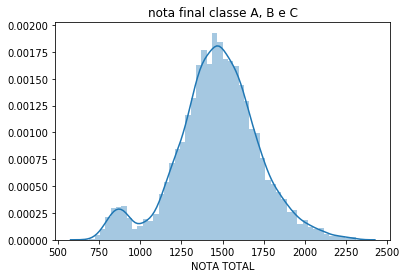

In [30]:
grafNormalized(df_manaus_A_B_C["NOTA TOTAL"],"nota final classe A, B e C")


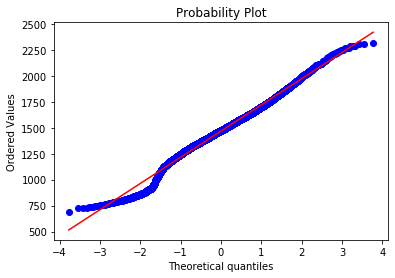

In [31]:
checkNormalDistribution(df_manaus_A_B_C["NOTA TOTAL"])

In [32]:
intervConfianca(df_manaus_A_B_C["NOTA TOTAL"])

Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida
Limite inferior 95%: 1461.951
Limite superior 95%: 1472.703


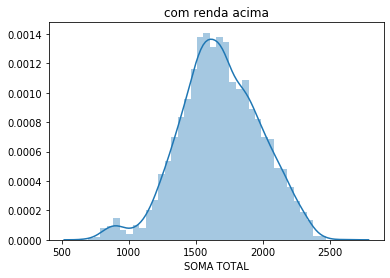

In [33]:
grafNormalized(df_manaus_acima["SOMA TOTAL"], "com renda acima")

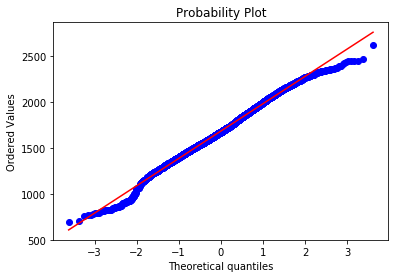

In [34]:
checkNormalDistribution(df_manaus_acima["SOMA TOTAL"])

In [35]:
intervConfianca(arr_acima)

Intervalo de Confiança ao nível de 95% para média quando a variância é desconhecida
Limite inferior 95%: 1672.045
Limite superior 95%: 1689.269


In [36]:
from scipy.stats import f_oneway

In [37]:
_, p = f_oneway(arr_A_B_C, arr_acima)
p

0.0

In [39]:
alpha = 0.05
if p <= alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


In [50]:
df_manaus_A = df_manaus.loc[(df_manaus["Q006"]=="A")]
df_manaus_A["NOTA TOTAL A"] = df_manaus_A.iloc[:,4:10].sum(axis=1)
save_A = []
for x in df_manaus_A["NOTA TOTAL A"]:
    save_A.append(x)
arr_A = np.array(save_A)
print(type(arr_A))

df_manaus_Q = df_manaus.loc[(df_manaus["Q006"]=="Q")]
df_manaus_Q["SOMA TOTAL Q"] = df_manaus_Q.iloc[:,4:10].sum(axis=1)

save_Q = []
for x in df_manaus_Q["SOMA TOTAL Q"]:
    save_Q.append(x)
arr_Q = np.array(save_Q)
print(type(arr_Q))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/pcorrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/pcorrea/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [51]:
_, p_value = f_oneway(arr_A, arr_Q)
p_value

5.318358222215116e-125

In [53]:
alpha = 0.05
if p_value <= alpha:
    print('Hipótese nula rejeitada')
else:
    print('Hipótese alternativa rejeitada')

Hipótese nula rejeitada


## **O nível de escolaridade da mãe influencia nas notas da Redação dos alunos de Manaus?**

# Criando um Dataset novo

## Adicionando os campos 

In [ ]:
enem_manaus = microdados_enem2019 [['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'SG_UF_RESIDENCIA','TP_ESCOLA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','Q002']]

In [ ]:
enem_manaus.head()

## Quem mora em outros Estados do brasil

In [ ]:
enem_brasil = enem_manaus.loc[lambda enem_manaus: enem_manaus['SG_UF_RESIDENCIA'] != 'AM']

In [ ]:
enem_brasil.info()

## Apenas quem mora em Manaus

In [ ]:
#enem.loc[enem['TP_DEPENDENCIA_ADM_ESC'] == 'AM']
enem_manaus = enem_manaus.loc[lambda enem_manaus: enem_manaus['SG_UF_RESIDENCIA'] == 'AM']

In [ ]:
enem_manaus.head()

## Verificando a quantidade de campos NaN

In [ ]:
# Para Manaus
NaN_manaus = pd.DataFrame({'tipos':enem_manaus.dtypes, 'missing':enem_manaus.isna().sum()})

In [ ]:
NaN_manaus

In [ ]:
# Para outros Estados
NaN_brasil = pd.DataFrame({'tipos':enem_brasil.dtypes, 'missing':enem_brasil.isna().sum()})

In [ ]:
NaN_brasil

In [ ]:
enem_manaus.head()

## Removendo valores vazios

In [ ]:
enem_manaus = enem_manaus.dropna()
enem_brasil = enem_brasil.dropna()

In [ ]:
#enem_manaus.head()
enem_brasil.head()

In [ ]:
enem_brasil.info()

In [ ]:
enem_manaus.info()

## Mapeando tipo de sexo de acordo com a planilha

In [ ]:
#Precisa limpar os NaN 
enem_manaus['TP_SEXO'] = enem_manaus['TP_SEXO'].map({'M':'Masculino','F':'Femenino'})

In [ ]:
enem_brasil['TP_SEXO'] = enem_brasil['TP_SEXO'].map({'M':'Masculino','F':'Femenino'})

In [ ]:
enem_manaus.head(10)

## Mapeando Tipo de raça com o dataset de acordo com a planilha

In [ ]:
enem_brasil.head(10)

In [ ]:
# Procurando valores divergentes
enem_manaus.loc[lambda enem_manaus: enem_manaus['TP_COR_RACA'] == 6]

In [ ]:
# Listando
enem_manaus['TP_COR_RACA'].map({0:'Não Declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

In [ ]:
# Listando
enem_brasil['TP_COR_RACA'].map({0:'Não Declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

In [ ]:
enem_manaus['TP_COR_RACA'] = enem_manaus['TP_COR_RACA'].map({0:'Não Declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})
enem_brasil['TP_COR_RACA'] = enem_brasil['TP_COR_RACA'].map({0:'Não Declarado', 1:'Branca', 2:'Preta', 3:'Parda', 4:'Amarela', 5:'Indígena'})

In [ ]:
enem_manaus.head()

In [ ]:
enem_brasil.head()

## Tipo de Escola

1 - Não Respondeu.
2 - Pública.
3 - Privada.
4 - Exterior.

In [ ]:
enem_manaus.loc[lambda enem_manaus: enem_manaus['TP_ESCOLA'] == 4]

In [ ]:
enem_manaus['TP_ESCOLA'] = enem_manaus['TP_ESCOLA'].map({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})
enem_brasil['TP_ESCOLA'] = enem_brasil['TP_ESCOLA'].map({1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'})

In [ ]:
enem_manaus.head()

## Até que serie a mãe, ou a mulher responsável pelo aluno estudou.

A	Nunca estudou.
B	Não completou a 4ª série/5º ano do Ensino Fundamental.
C	Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.
D	Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.
E	Completou o Ensino Médio, mas não completou a Faculdade.
F	Completou a Faculdade, mas não completou a Pós-graduação.
G	Completou a Pós-graduação.
H	Não sei.


In [ ]:
enem_manaus['Q002'] = enem_manaus['Q002'].map({'A': 'Nunca estudou.',
                        'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
                        'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
                        'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
                        'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
                        'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
                        'G':'Completou a Pós-graduação.',
                        'H':'Não sei.'
                        })

In [ ]:
enem_brasil['Q002'] = enem_brasil['Q002'].map({'A': 'Nunca estudou.',
                        'B':'Não completou a 4ª série/5º ano do Ensino Fundamental.',
                        'C':'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
                        'D':'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
                        'E':'Completou o Ensino Médio, mas não completou a Faculdade.',
                        'F':'Completou a Faculdade, mas não completou a Pós-graduação.',
                        'G':'Completou a Pós-graduação.',
                        'H':'Não sei.'
                        })

In [ ]:
enem_manaus.head()

Text(0.5, 1.0, 'Comparação entre médias(Redação) por nível de escolaridade da Mãe em Manaus')

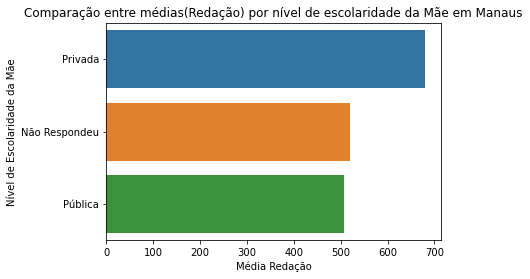

In [72]:
quadro_resumo_escolar_manaus = enem_manaus[['TP_ESCOLA', 'NU_NOTA_REDACAO']].groupby(['TP_ESCOLA']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).reset_index()

ax = sns.barplot(x="NU_NOTA_REDACAO", y="TP_ESCOLA", data=quadro_resumo_escolar_manaus)
ax.set_xlabel('Média Redação')
ax.set_ylabel('Nível de Escolaridade da Mãe')
ax.set_title('Comparação entre médias(Redação) por nível de escolaridade da Mãe em Manaus')

In [79]:
quadro_resumo_tipo_escola_manaus = enem_manaus[['TP_ESCOLA','NU_NOTA_REDACAO']].groupby('TP_ESCOLA')['NU_NOTA_REDACAO'].mean().sort_values(ascending=False)
quadro_resumo_tipo_escola_manaus

TP_ESCOLA
Privada          680.013063
Não Respondeu    519.065258
Pública          506.114747
Name: NU_NOTA_REDACAO, dtype: float64

In [69]:
teste = quadro_resumo_tipo_escola_manaus[['TP_ESCOLA', 'NU_NOTA_REDACAO']].groupby(['TP_ESCOLA']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).reset_index()
ax = sns.barplot(x="NU_NOTA_REDACAO", y="TP_ESCOLA", data=teste)
ax.set_xlabel('Média Redação')
ax.set_ylabel('Nível de Escolaridade da Mãe')
ax.set_title('Comparação entre médias(Redação) por nível de escolaridade da Mãe em Manaus')

KeyError: "None of [Index(['TP_ESCOLA', 'NU_NOTA_REDACAO'], dtype='object', name='TP_ESCOLA')] are in the [index]"

In [ ]:
quadro_resumo_escolaridade_mae_manaus = enem_manaus[['Q002', 'NU_NOTA_REDACAO']].groupby(['Q002']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).reset_index()
ax = sns.barplot(x="NU_NOTA_REDACAO", y="Q002", data=quadro_resumo_escolaridade_mae_manaus)
ax.set_xlabel('Média Redação')
ax.set_ylabel('Nível de Escolaridade da Mãe')
ax.set_title('Comparação entre médias(Redação) por nível de escolaridade da Mãe em Manaus')

## Graficos 

### O nível de escolaridade da mãe influencia na nota da Redação dos alunos Manaus

In [ ]:
medias_redacao_por_escolaridade_mae = enem_manaus.groupby('Q002')['NU_NOTA_REDACAO'].mean().sort_values(ascending=False)

In [43]:
medias_redacao_por_escolaridade_mae

Q002
Completou a Pós-graduação.                                                                 606.231884
Completou a Faculdade, mas não completou a Pós-graduação.                                  578.654160
Completou o Ensino Médio, mas não completou a Faculdade.                                   527.091768
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.       500.694766
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.    490.840210
Não completou a 4ª série/5º ano do Ensino Fundamental.                                     479.503289
Não sei.                                                                                   474.749141
Nunca estudou.                                                                             438.530716
Name: NU_NOTA_REDACAO, dtype: float64

Text(0.5, 1.0, 'Comparação entre médias(Redação) por nível de escolaridade da Mãe em Manaus')

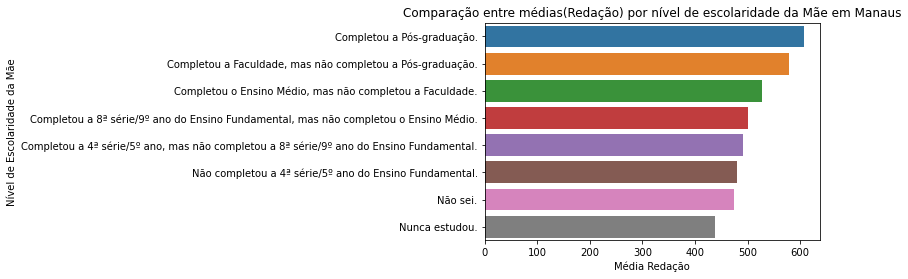

In [68]:
quadro_resumo_escolaridade_mae_manaus = enem_manaus[['Q002', 'NU_NOTA_REDACAO']].groupby(['Q002']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).reset_index()

ax = sns.barplot(x="NU_NOTA_REDACAO", y="Q002", data=quadro_resumo_escolaridade_mae_manaus)
ax.set_xlabel('Média Redação')
ax.set_ylabel('Nível de Escolaridade da Mãe')
ax.set_title('Comparação entre médias(Redação) por nível de escolaridade da Mãe em Manaus')

### O nível de escolaridade da mãe influencia na nota da Redação dos alunos de outros Estados

Text(0.5, 1.0, 'Comparação entre médias(Redação) por nível de escolaridade da Mãe em outros Estados')

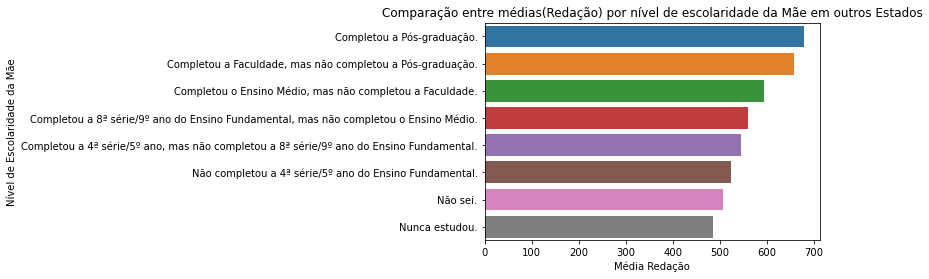

In [80]:
quadro_resumo_escolaridade_mae_brasil = enem_brasil[['Q002', 'NU_NOTA_REDACAO']].groupby(['Q002']).mean().sort_values(by='NU_NOTA_REDACAO', ascending=False).reset_index()
ax = sns.barplot(x="NU_NOTA_REDACAO", y="Q002", data=quadro_resumo_escolaridade_mae_brasil)
ax.set_xlabel('Média Redação')
ax.set_ylabel('Nível de Escolaridade da Mãe')
ax.set_title('Comparação entre médias(Redação) por nível de escolaridade da Mãe em outros Estados')

# Considerações Finais